# Logistic regression for the binary classification problem

Let's start with some basic formula. 

Logistic regression hypothesis is defined as:
\begin{align}
        h_\theta(x)=g(\theta^Tx)
    \end{align}
where function $g$ is the sigmoid function:
\begin{align}
        g(z)=\frac{1}{1+e^{-z}}
    \end{align}
There are many options for a cost function of the logistic regression, but I chose this one: 
\begin{align}
        J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))]
    \end{align}
The gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j$ = 0,1,...,n) is defined as follows:
\begin{align}
        \frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
    \end{align}

The gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('ex2data1.csv', header=None, names=['X1', 'X2', 'y'])

In [8]:
data.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0.5, 1.0, 'Scatter plot of training data')

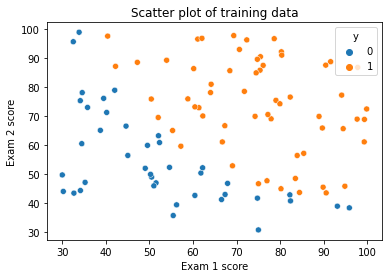

In [9]:
sns.scatterplot(data=data, x="X1", y="X2", hue="y")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')

In [10]:
def sigmoid(X, theta):
  return 1/(1 + np.exp(-X.dot(theta)))

def cost_function(X, theta, y):
  m = X.shape[0]
  cost = 1/m * (np.sum(-y*np.log(sigmoid(X, theta)) - 
                            (1 - y)*(np.log(1 - sigmoid(X, theta)))))
  return cost

In [11]:
X = data.copy()
X.insert(0, '1', 1)
y = X.pop('y')
X_np = X.to_numpy()
y_np = y.to_numpy()

In [12]:
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0.])

In [13]:
print(cost_function(X_np, theta, y_np))

0.6931471805599453


In [14]:
def gradient_descent(X, theta, y, num_iter, lr = 1e-10):
  m = X.shape[0]
  theta = np.zeros(X.shape[1])
  learning_rate = lr
  grad_array = []
  for i in range(num_iter):
    theta = theta - learning_rate * 1/m * np.transpose(X).dot(sigmoid(X, theta) - y)
    grad_array.append(cost_function(X_np, theta, y_np))
  return theta, grad_array

In [15]:
theta, grad_array = gradient_descent(X_np, theta, y_np, 1000000, 1e-3)

Text(0.5, 1.0, 'Gradient descent convergence')

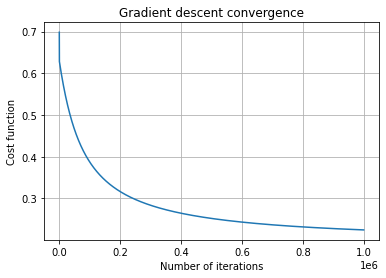

In [16]:
plt.plot(grad_array)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Gradient descent convergence')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatter plot of training data')

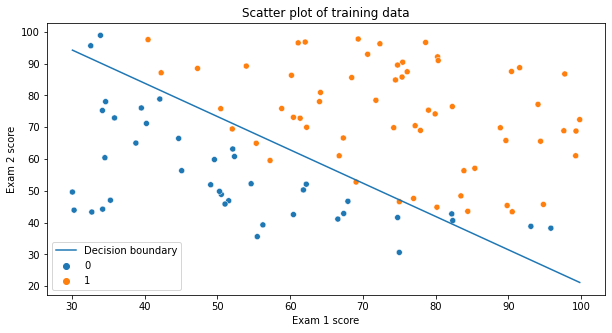

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x="X1", y="X2", hue="y")
plot_y = (-1/theta[2])*(theta[1]*data['X1'] + theta[0])
sns.lineplot(data["X1"], plot_y, label='Decision boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')

In [18]:
print('Best value of the cost function:', cost_function(X_np, theta, y_np))
print('Sigmoid values: \n', sigmoid(X_np, theta))

Best value of the cost function: 0.22465416189188273
Sigmoid values: 
 [0.19814279 0.00216238 0.1337288  0.94759104 0.98147031 0.06208162
 0.98611559 0.4823548  0.993772   0.68267774 0.82946201 0.1165341
 0.98932345 0.99580656 0.26677232 0.92079484 0.4808509  0.27624527
 0.99362838 0.57570889 0.18134998 0.98472003 0.05070155 0.00371227
 0.95465469 0.76127228 0.59380721 0.78582516 0.21256877 0.07871827
 0.80135441 0.92733685 0.27289416 0.44627001 0.17978224 0.11998565
 0.74350728 0.93967101 0.32941447 0.14237215 0.90574066 0.04544475
 0.9914136  0.53601853 0.03785262 0.26151456 0.95832407 0.99957685
 0.98809103 0.99926315 0.98095985 0.99190695 0.82241321 0.02739102
 0.05491889 0.15318464 0.99617726 0.6205803  0.93583701 0.96839622
 0.99166458 0.0059978  0.03320286 0.00421146 0.17839308 0.13881655
 0.85067983 0.06028361 0.99794163 0.65383312 0.00274858 0.9149604
 0.99656351 0.78780869 0.80889486 0.99811599 0.81807996 0.58945613
 0.08056052 0.59471812 0.98963013 0.91411063 0.80138911 0.31

In [19]:
def predict(X_np, theta):
  return np.array([1 if x >=0.5 else 0 for x in sigmoid(X_np, theta)])

In [20]:
def evaluation_score(X_np, theta, y_np):
  predictions = predict(X_np, theta)
  result = np.mean(predictions == y_np)
  return result

In [21]:
print('Accuracy:', evaluation_score(X_np, theta, y_np) * 100, '%')

Accuracy: 89.0 %


# Regularized logistic regression + feature mapping

In [76]:
data = pd.read_csv('ex2data2.csv', header=None, names=['X1', 'X2', 'y'])

In [77]:
data.head()

,X1,X2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [78]:
X = data.copy()
X.insert(0, '1', 1)
y = X.pop('y')

Text(0.5, 1.0, 'Scatter plot of training data')

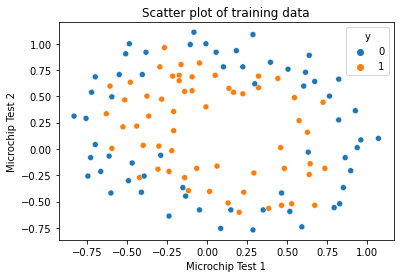

In [79]:
sns.scatterplot(data=data, x="X1", y="X2", hue="y")
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Scatter plot of training data')

### Feature mapping

As we can see in the figure above, it is imposible to split two classes with a straigth line. The solution to this problem is to use feature mapping.

For this task I will creare more features from each data point. To be more precise, I will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

\begin{align}
    mapFeature(x) &= \begin{bmatrix}
           1 \\
           x_{1} \\
           x_{2} \\
           x_{1}^{2} \\
           x_{1} x_{2} \\
           x_{2}^{2} \\
           x_{1}^{3} \\
           \vdots \\
           x_{1}x_{2}^{5} \\
           x_{2}^{6}
         \end{bmatrix}
  \end{align}

As a result of this mapping, the vector of two features has been transfromed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.

In [80]:
def feature_mapping(X, degree=6):
  X_spreaded = X.copy()
  cnt = 0
  for i in range(1, degree+1):
      for j in range(0, i+1):
          X_spreaded[str(cnt)] = X_spreaded.apply(lambda row: row['X1'] ** (i - j) 
          + row['X2'] ** j, axis=1)
          cnt += 1
  return X_spreaded

In [81]:
X_feature_map = feature_mapping(X, degree=6)


While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting. Here, the regularization comes to help.

### Regularization

Let's recall the regularized cost function in logistic regression:

\begin{align}
        J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
    \end{align}

The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:
\begin{align}
\frac{J(\theta)}{\partial\theta_0} = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}, \ \ \ \ \ for \ j=0
  \end{align}

\begin{align}
\frac{J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j, \ \ \ \ \ for \ j\geq1
  \end{align}

In [82]:
def reg_cost_function(X, theta, y, reg_const=1):
  m = X.shape[0]
  cost = (1/m * (np.sum(-y*np.log(sigmoid(X, theta)) - 
                            (1 - y)*(np.log(1 - sigmoid(X, theta))))) + 
                            reg_const/(2*m)*sum(theta ** 2))
  return cost

In [94]:
def reg_gradient_descent(X, theta, y, num_iter=500, lr = 1, reg_const=1):
  m = X.shape[0]
  theta = np.zeros(X.shape[1])
  learning_rate = lr
  grad_array = []
  tmp_array = np.ones(X.shape[1])
  tmp_array[0] = 0
  for i in range(num_iter):
    theta = (theta * (1 - reg_const *  1/m * tmp_array) -  
    learning_rate * 1/m * np.transpose(X).dot(sigmoid(X, theta) - y))
    grad_array.append(reg_cost_function(X, theta, y))
  return theta, grad_array

In [116]:
theta = np.zeros(X_feature_map.shape[1])
X_np = X_feature_map
y_np = y
reg_theta, reg_grad_array = reg_gradient_descent(X_np, theta, y_np, num_iter=50000, lr = 1e-3, reg_const=0)

Text(0.5, 1.0, 'Gradient descent convergence')

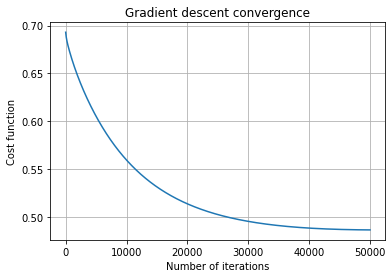

In [117]:
plt.plot(reg_grad_array)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Gradient descent convergence')

In [119]:
print('Accuracy:', evaluation_score(X_np, reg_theta, y_np) * 100, '%')

Accuracy: 77.11864406779661 %
